In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LSTM

In [3]:
text = pd.read_csv('ChatbotData.csv')
text.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [4]:
print(text.label.value_counts())

0    5290
1    3570
2    2963
Name: label, dtype: int64


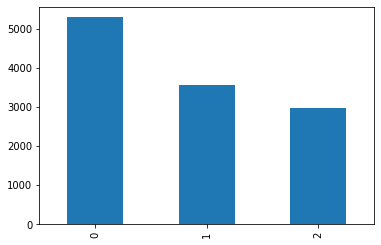

In [5]:
text.label.value_counts().plot(kind='bar')
plt.show()

In [10]:
text.loc[text.label==0,].head(3) # 일상다반사 (중립)

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0


In [7]:
text.loc[text.label==1,].head(3) # 이별(부정)

,Q,A,label
5290,1000일 만난 여자친구와 이별,더 오래 만날 사람 만날 거예요.,1
5291,10년 연애. 헤어졌습니다.,더 공허함이 크시겠네요.,1
5292,10년 연애사 되돌아보니 다 부질없네,더 좋은 사람 만나실 거예요.,1


In [9]:
text.loc[text.label==2,].head(3) # 사랑(긍정)

,Q,A,label
8860,짝사랑만큼 고통스러운 건 없겠지.,짝사랑 만큼 감정소모가 큰 건 없을 거예요.,2
8861,1년 넘게 만났는데 지금도 불타올라,정열적인 사랑을 하고 있나봐요.,2
8862,1년 동거 중인데 계속 좋아,서로 깊게 알게되면서 더 좋아졌나봅니다.,2


In [11]:
list(text['A'])[:5]

['하루가 또 가네요.', '위로해 드립니다.', '여행은 언제나 좋죠.', '여행은 언제나 좋죠.', '눈살이 찌푸려지죠.']

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(text['A']))
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)
print(tokenizer.word_index)

단어 집합의 크기 : 9849
{'거예요': 1, '수': 2, '더': 3, '같아요': 4, '좋은': 5, '있어요': 6, '잘': 7, '있을': 8, '많이': 9, '것': 10, '게': 11, '마세요': 12, '해보세요': 13, '건': 14, '수도': 15, '거': 16, '마음이': 17, '좋을': 18, '없어요': 19, '시간이': 20, '그': 21, '바랄게요': 22, '것도': 23, '사람': 24, '안': 25, '될': 26, '다른': 27, '돼요': 28, '좀': 29, '저도': 30, '좋아요': 31, '보세요': 32, '있는': 33, '그런': 34, '하세요': 35, '드세요': 36, '너무': 37, '않아요': 38, '좋죠': 39, '제가': 40, '바랍니다': 41, '그럴': 42, '할': 43, '걸': 44, '말해보세요': 45, '같이': 46, '해요': 47, '생각해요': 48, '사람이': 49, '좋겠어요': 50, '마음을': 51, '먼저': 52, '몰라요': 53, '이제': 54, '하고': 55, '일이': 56, '자신을': 57, '다': 58, '어떨까요': 59, '생각해보세요': 60, '하는': 61, '아니에요': 62, '정말': 63, '좋겠네요': 64, '주세요': 65, '힘든': 66, '다시': 67, '마음': 68, '있으면': 69, '때': 70, '한': 71, '바라요': 72, '그게': 73, '많은': 74, '사랑은': 75, '찾아보세요': 76, '말고': 77, '만큼': 78, '가보세요': 79, '저는': 80, '아직': 81, '괜찮아요': 82, '직접': 83, '좋아하는': 84, '그렇게': 85, '생각을': 86, '때가': 87, '도움이': 88, '충분히': 89, '물어보세요': 90, '있죠': 91, '않을': 92, '시간': 93, '사람은': 94, '쉽지': 9

In [13]:
sequences = list()
for line in text['A']: # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    sequences.append(encoded)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))
print(list(text['A'])[:5])
print(sequences[:5])

학습에 사용할 샘플의 개수: 11823
['하루가 또 가네요.', '위로해 드립니다.', '여행은 언제나 좋죠.', '여행은 언제나 좋죠.', '눈살이 찌푸려지죠.']
[[2985, 139, 1602], [615, 1603], [1321, 223, 39], [1321, 223, 39], [2986, 2987]]


In [14]:
# 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
max_len = max(len(l) for l in sequences) 
print('샘플의 최대 길이 : {}'.format(max_len))
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences)
sequences = np.array(sequences)
X_chatbot = sequences
y_chatbot = text.label

샘플의 최대 길이 : 21
[[   0    0    0 ... 2985  139 1602]
 [   0    0    0 ...    0  615 1603]
 [   0    0    0 ... 1321  223   39]
 ...
 [   0    0    0 ...    0    0 9847]
 [   0    0    0 ... 9848   16    4]
 [   0    0    0 ...  113  258   72]]


In [15]:
# y confirmation
unique_y = np.unique(y_chatbot)[-1] + 1
print('전체 y의 개수:', len(y_chatbot))
print('고유값 y의 개수:', unique_y)

전체 y의 개수: 11823
고유값 y의 개수: 3


In [16]:
# 고유값 y각각의 원핫벡터 변경, 총 13399 자리수 맞춤
y_one = to_categorical(y_chatbot, num_classes=unique_y)
print("one_hot_vector y:", y_one)

one_hot_vector y: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [20]:
embedding_dim = 16
hidden_units = 16
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(unique_y, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_chatbot, y_one, epochs=10, validation_split=0.2)

Epoch 1/10
296/296 [==============================] - 4s 10ms/step - loss: 0.8172 - accuracy: 0.6092 - val_loss: 2.5846 - val_accuracy: 0.0000e+00
Epoch 2/10
296/296 [==============================] - 3s 9ms/step - loss: 0.4785 - accuracy: 0.8379 - val_loss: 2.2458 - val_accuracy: 0.0140
Epoch 3/10
296/296 [==============================] - 2s 8ms/step - loss: 0.2545 - accuracy: 0.9166 - val_loss: 1.7250 - val_accuracy: 0.1822
Epoch 4/10
296/296 [==============================] - 2s 8ms/step - loss: 0.1651 - accuracy: 0.9495 - val_loss: 2.1686 - val_accuracy: 0.1712
Epoch 5/10
296/296 [==============================] - 2s 8ms/step - loss: 0.1211 - accuracy: 0.9621 - val_loss: 2.5182 - val_accuracy: 0.1831
Epoch 6/10
296/296 [==============================] - 2s 8ms/step - loss: 0.0974 - accuracy: 0.9663 - val_loss: 2.8691 - val_accuracy: 0.1810
Epoch 7/10
296/296 [==============================] - 2s 8ms/step - loss: 0.0862 - accuracy: 0.9692 - val_loss: 3.2466 - val_accuracy: 0.1725
E

In [21]:
embedding_dim = 64
hidden_units = 64

model_lstm = Sequential()
model_lstm.add(Embedding(vocab_size, embedding_dim))
model_lstm.add(LSTM(hidden_units))
model_lstm.add(Dense(unique_y, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X_chatbot, y_one, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
296/296 [==============================] - 10s 25ms/step - loss: 0.7481 - accuracy: 0.6678 - val_loss: 2.3374 - val_accuracy: 0.0000e+00
Epoch 2/10
296/296 [==============================] - 8s 28ms/step - loss: 0.4029 - accuracy: 0.8590 - val_loss: 2.6035 - val_accuracy: 0.0613
Epoch 3/10
296/296 [==============================] - 7s 24ms/step - loss: 0.2317 - accuracy: 0.9206 - val_loss: 2.3414 - val_accuracy: 0.2156
Epoch 4/10
296/296 [==============================] - 7s 24ms/step - loss: 0.1481 - accuracy: 0.9504 - val_loss: 3.0753 - val_accuracy: 0.2076
Epoch 5/10
296/296 [==============================] - 7s 25ms/step - loss: 0.1164 - accuracy: 0.9599 - val_loss: 2.7901 - val_accuracy: 0.2740
Epoch 6/10
296/296 [==============================] - 7s 24ms/step - loss: 0.1035 - accuracy: 0.9631 - val_loss: 4.0219 - val_accuracy: 0.2080
Epoch 7/10
296/296 [==============================] - 7s 24ms/step - loss: 0.0945 - accuracy: 0.9667 - val_loss: 3.1953 - val_accuracy: 0

In [22]:
def sentiment_analysis(model, tokenizer, current_word): # 모델, 토크나이저, 현재 단어
  # 현재 단어에 대한 정수 인코딩과 패딩
  encoded = tokenizer.texts_to_sequences([current_word])[0]
  encoded = pad_sequences([encoded], maxlen=5, padding='pre')
  # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
  result = model.predict(encoded, verbose=0)
  result = np.argmax(result, axis=1)
  if result == [0]:
    word_result = '감성분석: 중립'
  elif result == [1]:
    word_result = '감성분석: 긍정'
  else:
    word_result = '감성분석: 부정' 
  return word_result

In [23]:
sentiment_analysis(model, tokenizer, '하루가 또 가네요')

'감성분석: 중립'

In [24]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LSTM

text = pd.read_csv('ChatbotData.csv')
text_ga = text.A.copy()
text_gq = text.Q.copy()

tokenizer_ga = Tokenizer()
tokenizer_gq = Tokenizer()

tokenizer_ga.fit_on_texts(list(text_ga))
tokenizer_gq.fit_on_texts(list(text_gq))

vocab_size_ga = len(tokenizer_ga.word_index) + 1
vocab_size_gq = len(tokenizer_gq.word_index) + 1

sequences_ga = list()
sequences_gq = list()

for line in text_ga: # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer_ga.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences_ga.append(sequence)

for line in text_gq: # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer_ga.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences_gq.append(sequence)

# 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
max_len_ga = max(len(l) for l in sequences_ga) 
max_len_gq = max(len(l) for l in sequences_gq) 

sequences_ga = pad_sequences(sequences_ga, maxlen=max_len_ga, padding='pre')
sequences_ga = np.array(sequences_ga)
X_chatbot_ga = sequences_ga[:,:-1]
y_chatbot_ga = sequences_ga[:, -1]

sequences_gq = pad_sequences(sequences_gq, maxlen=max_len_gq, padding='pre')
sequences_gq = np.array(sequences_gq)
X_chatbot_gq = sequences_gq[:,:-1]
y_chatbot_gq = sequences_gq[:, -1]

# 고유값 y각각의 원핫벡터 변경, 총 13399 자리수 맞춤
y_one_ga = to_categorical(y_chatbot_ga, num_classes=vocab_size_ga)
y_one_gq = to_categorical(y_chatbot_gq, num_classes=vocab_size_gq)

embedding_dim = [2, 4, 8, 16, 32]
hidden_units = [2, 4, 8, 16, 32]

for i, (ed, hu) in enumerate(zip(embedding_dim, hidden_units)):
  print('Answer Text generation model {0}번째 학습 with embedding_dim: {1}, hidden_units: {2}'.format(i+1, ed, hu))
  model_lstm_ga = Sequential()
  model_lstm_ga.add(Embedding(vocab_size_ga, ed))
  model_lstm_ga.add(LSTM(hu))
  model_lstm_ga.add(Dense(vocab_size_ga, activation='softmax'))
  model_lstm_ga.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model_lstm_ga.fit(X_chatbot_ga, y_one_ga, epochs=5, verbose=1, validation_split=0.2)

for i, (ed, hu) in enumerate(zip(embedding_dim, hidden_units)):
  print('Question Text generation model {0}번째 학습 with embedding_dim: {1}, hidden_units: {2}'.format(i+1, ed, hu))
  model_lstm_gq = Sequential()
  model_lstm_gq.add(Embedding(vocab_size_gq, ed))
  model_lstm_gq.add(LSTM(hu))
  model_lstm_gq.add(Dense(vocab_size_gq, activation='softmax'))
  model_lstm_gq.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model_lstm_gq.fit(X_chatbot_gq, y_one_gq, epochs=5, verbose=1, validation_split=0.2)

Answer Text generation model 1번째 학습 with embedding_dim: 2, hidden_units: 2
Epoch 1/5
797/797 [==============================] - 18s 20ms/step - loss: 8.6870 - accuracy: 0.0355 - val_loss: 8.5826 - val_accuracy: 0.0224
Epoch 2/5
797/797 [==============================] - 16s 20ms/step - loss: 7.9441 - accuracy: 0.0358 - val_loss: 8.5614 - val_accuracy: 0.0224
Epoch 3/5
797/797 [==============================] - 17s 21ms/step - loss: 7.7361 - accuracy: 0.0358 - val_loss: 8.6413 - val_accuracy: 0.0224
Epoch 4/5
797/797 [==============================] - 14s 18ms/step - loss: 7.6608 - accuracy: 0.0358 - val_loss: 8.7093 - val_accuracy: 0.0224
Epoch 5/5
797/797 [==============================] - 16s 20ms/step - loss: 7.5850 - accuracy: 0.0358 - val_loss: 8.6814 - val_accuracy: 0.0224
Answer Text generation model 2번째 학습 with embedding_dim: 4, hidden_units: 4
Epoch 1/5
797/797 [==============================] - 21s 23ms/step - loss: 8.4615 - accuracy: 0.0355 - val_loss: 8.4832 - val_accuracy:

In [25]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [26]:
new_text = sentence_generation(model_lstm_ga, tokenizer_ga, '너는', 5)
print('생성단어: {}'.format(new_text))
print(sentiment_analysis(model_lstm_ga, tokenizer_ga, new_text))

생성단어: 너는 있을 거예요 더 더 더
감성분석: 부정


In [27]:
import nltk
nltk.download('treebank')
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer # 토큰화
from tensorflow.keras.preprocessing.sequence import pad_sequences # 패딩
from tensorflow.keras.utils import to_categorical # 원핫벡터
from sklearn.model_selection import train_test_split # 학습데이터 분리

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


In [28]:
tagged_sentences = nltk.corpus.treebank.tagged_sents()
print("품사 태깅이 된 문장 개수: ", len(tagged_sentences))
tagged_sentences[0]

품사 태깅이 된 문장 개수:  3914


[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [30]:
b='' 
for i, j in tagged_sentences[0]:
  b += (i+" ")
print(b)

Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 . 


In [32]:
sentences, pos_tags = [], [] 
for tagged_sentence in tagged_sentences: # 3,914개의 문장 샘플을 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 샘플에서 단어들은 sentence에 품사 태깅 정보들은 tag_info에 저장한다.
    # zip 함수에를 사용하면 각 열끼리 데이터를 묶게 된다. 지금은 3914행 2열이개 때문에 결과가 두 개의 데이터가 나오게 되고 반복문에 의해 입력된다.
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    pos_tags.append(list(tag_info)) # 각 샘플에서 품사 태깅 정보만 저장한다.

In [33]:
[len(tagged_sentences[i]) for i in range(10)]

[18, 13, 27, 41, 35, 27, 37, 12, 16, 10]

In [34]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences))) # map(함수, 복수데이터)

샘플의 최대 길이 : 271
샘플의 평균 길이 : 25.722024


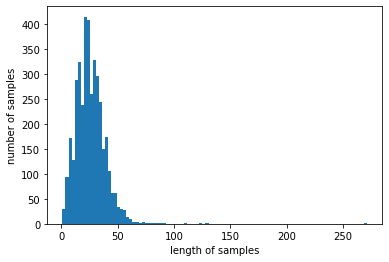

In [35]:
plt.hist(list(map(len, sentences)), bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [40]:
def tokenize(samples):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(samples)  
    return tokenizer

In [41]:
src_tokenizer = tokenize(sentences)
tar_tokenizer = tokenize(pos_tags)
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 11388
태깅 정보 집합의 크기 : 47


In [42]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(pos_tags)

max_len = 100

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)

print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (3131, 100)
훈련 샘플 레이블의 크기 : (3131, 100)
테스트 샘플 문장의 크기 : (783, 100)
테스트 샘플 레이블의 크기 : (783, 100)


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam

embedding_dim = 128
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, mask_zero=True))
model.add(Bidirectional(LSTM(hidden_units, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation=('softmax'))))

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7
25/25 [==============================] - 57s 2s/step - loss: 0.8824 - accuracy: 0.1404 - val_loss: 0.7690 - val_accuracy: 0.1693
Epoch 2/7
25/25 [==============================] - 24s 977ms/step - loss: 0.7512 - accuracy: 0.2000 - val_loss: 0.7163 - val_accuracy: 0.2473
Epoch 3/7
25/25 [==============================] - 24s 973ms/step - loss: 0.6714 - accuracy: 0.3645 - val_loss: 0.5891 - val_accuracy: 0.4567
Epoch 4/7
25/25 [==============================] - 24s 968ms/step - loss: 0.4963 - accuracy: 0.5217 - val_loss: 0.3941 - val_accuracy: 0.6241
Epoch 5/7
25/25 [==============================] - 26s 1s/step - loss: 0.3123 - accuracy: 0.7198 - val_loss: 0.2397 - val_accuracy: 0.7946
Epoch 6/7
25/25 [==============================] - 34s 1s/step - loss: 0.1754 - accuracy: 0.8722 - val_loss: 0.1452 - val_accuracy: 0.8862
Epoch 7/7
25/25 [==============================] - 26s 1s/step - loss: 0.0996 - accuracy: 0.9273 - val_loss: 0.1032 - val_accuracy: 0.9045


In [44]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

25/25 [==============================] - 3s 102ms/step - loss: 0.1032 - accuracy: 0.9045

 테스트 정확도: 0.9045


In [45]:
print('X_test의 길이:',len(X_test[10]))
X_test[10]

X_test의 길이: 100


array([   7,  499,    1,  681,   20,    6, 1058, 3612, 5276,  232,  154,
        636,  509,  823,    1,   53,   10,   15,   39,  154,  636, 1379,
          3,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [46]:
print('y_test의 길이:',len(y_test[10]))
print(y_test[10].shape)
y_test[10]

y_test의 길이: 100
(100,)


array([ 2,  1,  8,  3, 17,  4, 12, 16,  1,  2,  3,  3,  1,  6,  8, 17,  5,
        5,  4,  3,  3,  1,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

In [47]:
y_predicted = model.predict(np.array([X_test[10]])) # 입력한 테스트용 샘플에 대해서 예측값 y를 리턴
print(len(y_predicted[0]))
print(y_predicted.shape)
y_predicted[0]

100
(1, 100, 47)


array([[9.4501706e-07, 1.3382095e-03, 9.5300245e-01, ..., 2.2889346e-06,
        1.7364691e-06, 1.6604018e-06],
       [1.1452115e-06, 9.5842916e-01, 1.3246689e-03, ..., 3.9012621e-06,
        1.6933878e-06, 2.8615671e-06],
       [2.0940904e-07, 2.8795819e-04, 1.2608392e-04, ..., 1.6796348e-07,
        4.9467877e-07, 1.8531074e-07],
       ...,
       [2.0845532e-02, 2.2081055e-02, 2.1677813e-02, ..., 2.0838352e-02,
        2.0878071e-02, 2.0848375e-02],
       [2.0845532e-02, 2.2081055e-02, 2.1677813e-02, ..., 2.0838352e-02,
        2.0878071e-02, 2.0848375e-02],
       [2.0845532e-02, 2.2081055e-02, 2.1677813e-02, ..., 2.0838352e-02,
        2.0878071e-02, 2.0848375e-02]], dtype=float32)

In [48]:
y_predicted = np.argmax(y_predicted, axis=-1)
print(len(y_predicted[0]))
print(y_predicted.shape)
y_predicted[0]

100
(1, 100)


array([ 2,  1,  8,  3, 17,  4, 12, 16,  1,  2,  3,  3,  1,  6,  8, 17,  5,
        5,  4,  3,  3,  1,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9])

In [49]:
def tokenize(samples):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(samples)
  return tokenizer

In [50]:
index_to_word = src_tokenizer.index_word
index_to_tag = tar_tokenizer.index_word

i = 14 # 확인하고 싶은 테스트용 샘플의 인덱스
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측값 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 확률 벡터를 정수 레이블로 변환.

print("{:16}{:8}{:8}{}".format("단어", "실제값", "예측값", "결과"))

for word, tag, pred in zip(X_test[i], y_test[i], y_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:16}: {:9}{:8}{}".format(index_to_word[word], 
                                      index_to_tag[tag].upper(), 
                                      index_to_tag[pred].upper(),
                                      tag == pred))

단어              실제값     예측값     결과
currently       : RB       RB      True
,               : ,        ,       True
the             : DT       DT      True
government      : NN       NN      True
charges         : VBZ      NNS     False
nothing         : NN       NN      True
for             : IN       IN      True
such            : JJ       JJ      True
filings         : NNS      NNS     True
.               : .        .       True
